In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_excel('Fraud_data3.xlsx')

In [161]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Data_FLAG
0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,TRAINING
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,TRAINING
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,TRAINING
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,TRAINING
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,TRAINING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2019-01-04 05:09:49,2235335206132660,fraud_Lynch Ltd,shopping_pos,1180.30,Maria,Rosales,F,6611 Parrish Garden Apt. 428,Waynesfield,...,-83.9585,2089,Building control surveyor,1963-06-22,44827746427d28ce90c337b84cdad67c,1325653789,40.438221,-83.485925,0,TRAINING
4996,2019-01-04 05:12:33,375237305371366,fraud_Friesen-Stamm,gas_transport,83.47,David,Erickson,M,616 Jimenez Meadow Apt. 701,East Rochester,...,-77.4906,8019,Retail buyer,1928-06-26,51669b87249060cc80b9af943c9869af,1325653953,42.415407,-78.158282,0,TRAINING
4997,2019-01-04 05:13:23,2235335206132660,fraud_Paucek-Wiza,grocery_net,36.64,Maria,Rosales,F,6611 Parrish Garden Apt. 428,Waynesfield,...,-83.9585,2089,Building control surveyor,1963-06-22,eb74899e4d7095d2445ac4e4eb6ae473,1325654003,40.958936,-84.629338,0,TRAINING
4998,2019-01-04 05:14:46,502012776709,fraud_Welch Inc,misc_net,6.21,Sherry,Martinez,F,144 Yu Locks Apt. 754,Garrattsville,...,-75.1866,165,Naval architect,1945-09-20,eaf4f0819ce9a160401c14d462b942bf,1325654086,43.269532,-76.124026,0,TRAINING


In [162]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Data_FLAG                0
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  5000 non-null   datetime64[ns]
 1   cc_num                 5000 non-null   int64         
 2   merchant               5000 non-null   object        
 3   category               5000 non-null   object        
 4   amt                    5000 non-null   float64       
 5   first                  5000 non-null   object        
 6   last                   5000 non-null   object        
 7   gender                 5000 non-null   object        
 8   street                 5000 non-null   object        
 9   city                   5000 non-null   object        
 10  state                  5000 non-null   object        
 11  zip                    5000 non-null   int64         
 12  lat                    5000 non-null   float64       
 13  lon

In [164]:
df.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,5000,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5.000000e+03,5000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2019-01-02 09:27:32.341399808,4.162072e+17,66.530250,49988.18420,38.565623,-90.841700,9.018731e+04,1972-12-04 20:50:29.760000,1.325496e+09,38.569326,-90.832791,0.004400
min,2019-01-01 00:00:18,6.041621e+10,1.030000,1257.00000,20.027100,-165.672300,2.300000e+01,1926-06-26 00:00:00,1.325376e+09,19.165823,-166.288628,0.000000
25%,2019-01-01 14:43:11.249999872,1.800429e+14,9.545000,26292.00000,34.880300,-97.289300,7.320000e+02,1961-11-24 00:00:00,1.325429e+09,34.896501,-97.535476,0.000000
50%,2019-01-02 02:40:25.500000,3.521616e+15,47.790000,49629.00000,39.401500,-88.091100,2.328000e+03,1975-06-01 00:00:00,1.325472e+09,39.398968,-88.167469,0.000000
75%,2019-01-03 05:24:02.750000128,4.658491e+15,81.417500,72583.00000,41.811475,-80.307000,1.905400e+04,1986-04-28 00:00:00,1.325568e+09,41.931518,-80.333738,0.000000
max,2019-01-04 05:15:54,4.992346e+18,3178.510000,99783.00000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,1.325654e+09,66.645176,-66.967742,1.000000
std,NaN,1.307228e+18,107.259582,27223.22636,5.113967,14.423371,2.975016e+05,NaN,8.172276e+04,5.138705,14.436099,0.066193


In [246]:
# a Provide descriptive measures of column “amt”: count, Min, Max, Mean, and Std. deviation. Write the count of fraudulent and normal transactions.
# Descriptive measures for the 'amt' column
amt_descriptive = df['amt'].describe()

In [247]:
# Count of fraudulent and normal transactions
fraudulent_count = df[df['is_fraud'] == 1]['is_fraud'].count()
normal_count = df[df['is_fraud'] == 0]['is_fraud'].count()

In [248]:
print("Descriptive measures for 'amt' column:")
print(amt_descriptive)
print("\nCount of fraudulent transactions:", fraudulent_count)
print("Count of normal transactions:", normal_count)

Descriptive measures for 'amt' column:
count    5000.000000
mean       66.530250
std       107.259582
min         1.030000
25%         9.545000
50%        47.790000
75%        81.417500
max      3178.510000
Name: amt, dtype: float64

Count of fraudulent transactions: 22
Count of normal transactions: 4978


In [165]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Data_FLAG'],
      dtype='object')

In [249]:
from sklearn.preprocessing import LabelEncoder

In [167]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Data_FLAG
0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,TRAINING
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,TRAINING
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,TRAINING
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,TRAINING
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,TRAINING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2019-01-04 05:09:49,2235335206132660,fraud_Lynch Ltd,shopping_pos,1180.30,Maria,Rosales,F,6611 Parrish Garden Apt. 428,Waynesfield,...,-83.9585,2089,Building control surveyor,1963-06-22,44827746427d28ce90c337b84cdad67c,1325653789,40.438221,-83.485925,0,TRAINING
4996,2019-01-04 05:12:33,375237305371366,fraud_Friesen-Stamm,gas_transport,83.47,David,Erickson,M,616 Jimenez Meadow Apt. 701,East Rochester,...,-77.4906,8019,Retail buyer,1928-06-26,51669b87249060cc80b9af943c9869af,1325653953,42.415407,-78.158282,0,TRAINING
4997,2019-01-04 05:13:23,2235335206132660,fraud_Paucek-Wiza,grocery_net,36.64,Maria,Rosales,F,6611 Parrish Garden Apt. 428,Waynesfield,...,-83.9585,2089,Building control surveyor,1963-06-22,eb74899e4d7095d2445ac4e4eb6ae473,1325654003,40.958936,-84.629338,0,TRAINING
4998,2019-01-04 05:14:46,502012776709,fraud_Welch Inc,misc_net,6.21,Sherry,Martinez,F,144 Yu Locks Apt. 754,Garrattsville,...,-75.1866,165,Naval architect,1945-09-20,eaf4f0819ce9a160401c14d462b942bf,1325654086,43.269532,-76.124026,0,TRAINING


In [169]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Data_FLAG                0
dtype: int64

In [241]:
#b Show graph of Normalized frequency for columns category and Is_fraud to show frequency for normal and fraudulent transactions.
category_counts = df['category'].value_counts()

In [242]:
category_normalized = category_counts / category_counts.sum()

In [243]:
fraud_counts = df['is_fraud'].value_counts()
fraud_normalized = fraud_counts / fraud_counts.sum()


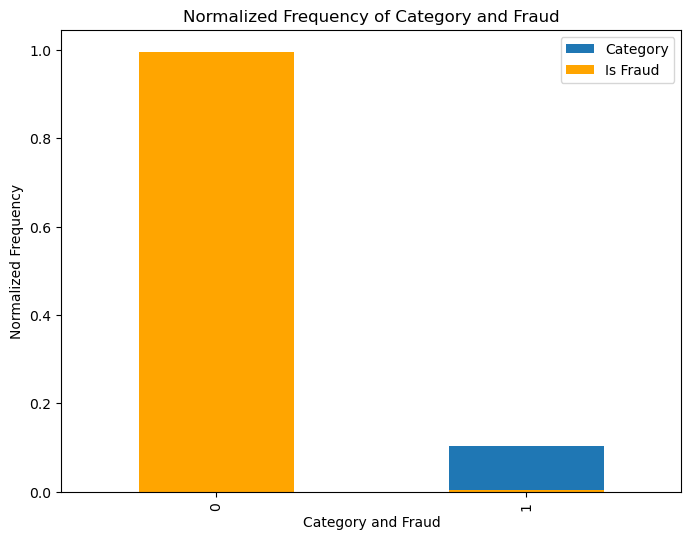

In [244]:
fig, ax = plt.subplots(figsize=(8, 6))
category_normalized.plot(kind='bar', ax=ax, label='Category')
fraud_normalized.plot(kind='bar', ax=ax, label='Is Fraud', color='orange')

# Customize the plot
plt.xlabel('Category and Fraud')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Frequency of Category and Fraud')
plt.legend()

# Show the plot
plt.show()


In [170]:
# Drop unnecessary columns (e.g., 'first', 'last', 'street', etc.)
df = df.drop(['first', 'last', 'street', 'city', 'state'], axis=1)


In [171]:
df = df.fillna(0)

In [188]:
# Check unique values in the target variable
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [189]:
#trans_date_trans_time
df['trans_date_trans_time_new'] = (df['trans_date_trans_time'] - pd.Timestamp("1970-01-01")).dt.days

In [191]:
# Data Cleaning and Feature Engineering
# Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
categorical_features = ['merchant', 'category',  'gender',  'job', 'trans_num', 'Data_FLAG']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [194]:
# Split the data into features (X) and target variable (y) for the training datasets
X_train = df[['trans_date_trans_time_new', 'cc_num',  'merchant', 'category', 'amt',  'gender', 'zip',  'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long']].values
y_train = df['is_fraud'].values

In [195]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [196]:
X_train

array([[-0.9059832 , -0.31635293,  0.86486836, ..., -1.47384138,
        -0.49784706,  0.60856845],
       [-0.9059832 , -0.31842053, -0.50198966, ..., -1.4735232 ,
         2.06098236, -1.89499999],
       [-0.9059832 , -0.31839128,  0.24174191, ..., -1.47343754,
         0.89163246, -1.4771181 ],
       ...,
       [ 2.26474663, -0.31671086,  0.68396068, ...,  1.92806036,
         0.46506832,  0.42976106],
       [ 2.26474663, -0.31842063,  1.60357471, ...,  1.92907609,
         0.91475889,  1.01898968],
       [ 2.26474663, -0.31535315,  1.11110381, ...,  1.92990826,
        -1.55459993, -0.35721728]])

In [197]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [198]:
from sklearn.svm import LinearSVC

In [199]:

clf_linear = LinearSVC()


In [200]:
# Train the SVM model
clf_linear.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [201]:
#Loading the testing dataset
df2 = pd.read_excel('Fraud_data4.xlsx')

In [202]:

categorical_features = ['merchant', 'category',  'gender', 'job', 'trans_num', 'Data_FLAG']
for feature in categorical_features:
    df2[feature] = label_encoder.fit_transform(df2[feature])

In [203]:
#trans_date_trans_time
df['trans_date_trans_time_new'] = (df['trans_date_trans_time'] - pd.Timestamp("1970-01-01")).dt.days

In [204]:
# Split the data into features (X) and target variable (y) for the training datasets
X_test = df2[['trans_date_trans_time_new', 'cc_num',  'merchant', 'category', 'amt',  'gender', 'zip',  'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long']].values
y_test = df2['is_fraud'].values

In [205]:
# Make predictions on the test set
y_pred = clf_linear.predict(X_test)

In [206]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

In [208]:
accuracy_score(y_test,y_pred)

0.9954977488744372

In [ ]:
#Accuracy is the measure of the overall correctness of the model. In this case, the model achieved an accuracy of approximately 99.5%, meaning it is correctly
# classified about 99.5% of the instances in the test set

In [238]:
# A confusion matrix provides a detailed breakdown of the model's predictions. Each row represents the actual class, and each column represents the predicted class. 
# The diagonal element represents the number of correct predictions for each class.
confusion_matrix(y_test,y_pred)

array([[1990,    0],
       [   9,    0]], dtype=int64)

In [239]:
# C. Perform Error analysis using confusion matrix, which is created with four categories - true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
Tp = 1990, FP = 0, TN = 9, FN = 0
Precision (P) = TP/(TP + FP)
Recall (R) = TP/(TP + FN)
Accuracy = (TP + TN)/(TP + FP + TN + FN)
F1 score = (2 * P * R\/(P + R)


SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (788572421.py, line 1)

In [ ]:
P = 1990/(1990 + 0) = 1
R = 1990/(1990 + 0) = 1
Accuracy = 1999 / 1999 = 1
F1 score = 2 * 1* 1/ 2 = 1

In [231]:
#D
# New predictions
#Based on the features below, predict the status of the transaction if it is Fraud: 
new_predictions = pd.DataFrame({
'trans_date_trans_time': ['12/2/2020 22:27'],
'cc_num': [3.588E+15],
'merchant': ['fraud_Torphy-Goyette'],
'category': ['shopping_pos'],
'amt': [1318.89],
'first': ['Jason'], 
'last': ['Johnson'], 
'gender': ['M'],
'street': ['5942 Thomas Park'], 
'city': ['Craig'],
'state': ['AK'],
'zip': [99921],    
'lat': [55.4732], 
'long': [-133.1171], 
'city_pop': [1920],
'job': ['Commissioning editor'], 
'dob': ['6/17/1997'],
'trans_num': ['2682f81f3f9e070b7abc721ca4bd5862'],
'unix_time': [1386023256],
'merch_lat':  [54.801713], 
'merch_long': [-133.669108],
})

In [232]:
new_predictions

categorical_features = ['merchant', 'category',  'gender', 'job', 'trans_num',]
for feature in categorical_features:
    new_predictions[feature] = label_encoder.fit_transform(new_predictions[feature])

In [233]:
type(new_predictions['trans_date_trans_time'])

pandas.core.series.Series

In [234]:
new_predictions['trans_date_trans_time'] = pd.to_datetime(new_predictions['trans_date_trans_time'])

# Now, subtract the Timestamp object representing "1970-01-01"
new_predictions['trans_date_trans_time_new'] = (new_predictions['trans_date_trans_time'] - pd.Timestamp("1970-01-01")).dt.days

In [235]:
X_pred = new_predictions[['trans_date_trans_time_new', 'cc_num',  'merchant', 'category', 'amt',  'gender', 'zip',  'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long']].values


In [236]:
predicted_value = clf_linear.predict(X_pred)

In [237]:
predicted_value

array([0], dtype=int64)

In [ ]:
#from the predicted_value, we can see that it is not a fraud